# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Three observations from the data:
- The data suggests the higher the weight of the mouse, the more propensity to tumours
- Although Capomulin had one of the highest number of observations of the mouse regimens, it also had the most efficacy in terms of the range of tumours being lower with the lowest outliers
- The data was conducted on a slighty higher number of male mice than female mice (51% vs 49%)

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [83]:
#See data details for mouse data:
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [84]:
#See data details for study data:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [85]:
# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [86]:
#Check the number of mice in the DataFrame.
len(combined_data_df["Mouse ID"].unique())

249

In [87]:
# Our data should be uniquely identified by Mouse ID and Timepoint
combined_data_df.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
g989      0          45.000000           0                 Propriva      Female  21          26            2
a203      0          45.000000           0                 Infubinol     Female  20          23            1
q597      40         44.471821           2                 Ramicane      Male    20          25            1
q633      10         49.001866           0                 Zoniferol     Male    12          25            1
          5          47.183802           0                 Zoniferol     Male    12          25            1
                                                                                                          ..
i177      45         33.562402           3                 Ramicane      Male    10          18            1
          40         35.557933           2                 Ramicane      Male    10          18            1
          35         35.

In [88]:
#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#TO DO
duplicate_mouse_ids = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df=combined_data_df.set_index('Mouse ID')
index_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Reset index
clean_data_df =index_df.drop_duplicates()
clean_data_df.count()
clean_data_df = clean_data_df.reset_index()
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
# Checking the number of mice in the clean DataFrame.
clean_data_df['Mouse ID'].value_counts()

g989    12
b128    10
a275    10
k862    10
i635    10
        ..
v199     1
x226     1
b447     1
n482     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_table = clean_data_df.groupby(['Drug Regimen'])
tumor_mean = drug_regimen_table['Tumor Volume (mm3)'].mean()
tumor_median = drug_regimen_table['Tumor Volume (mm3)'].median()
tumor_variance = drug_regimen_table['Tumor Volume (mm3)'].var()
tumor_standard_deviation = drug_regimen_table['Tumor Volume (mm3)'].std()
tumor_sem = drug_regimen_table ['Tumor Volume (mm3)'].sem()

summary_tumor_table =pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev.': tumor_standard_deviation,
    'Tumor Volume Std. Err.': tumor_sem
})
summary_tumor_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,53.019963,51.852437,42.782010,6.540796,0.494438
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.134515,52.343085,60.928203,7.805652,0.583422
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.195673,40.668343,23.488945,4.846539,0.321676
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_table = clean_data_df.groupby(['Drug Regimen'])
tumor_mean = drug_regimen_table['Tumor Volume (mm3)'].mean()
tumor_median = drug_regimen_table['Tumor Volume (mm3)'].median()
tumor_variance = drug_regimen_table['Tumor Volume (mm3)'].var()
tumor_standard_deviation = drug_regimen_table['Tumor Volume (mm3)'].std()
tumor_sem = drug_regimen_table ['Tumor Volume (mm3)'].sem()

summary_tumor_table =pd.DataFrame({
    'mean': tumor_mean,
    'median': tumor_median,
    'var': tumor_variance,
    'Std': tumor_standard_deviation,
    'sem': tumor_sem
})
summary_tumor_table

,mean,median,var,Std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,53.019963,51.852437,42.782010,6.540796,0.494438
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.134515,52.343085,60.928203,7.805652,0.583422
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.195673,40.668343,23.488945,4.846539,0.321676
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

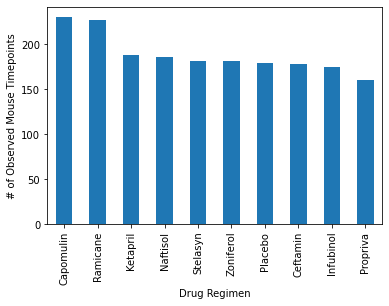

In [94]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_regimen = clean_data_df.groupby(["Drug Regimen"])['Timepoint'].count()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
mice_per_regimen.sort_values(ascending=False).plot.bar()


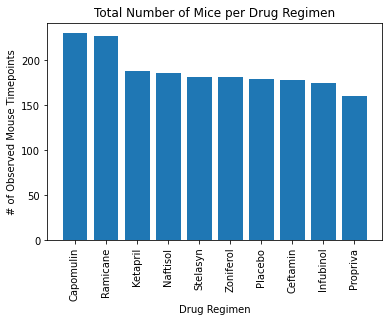

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar_mice_per_regimen = mice_per_regimen.sort_values(ascending=False)
plt.bar(pyplot_bar_mice_per_regimen.index,pyplot_bar_mice_per_regimen.values)
plt.title("Total Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate number of mice for each sex
sex_mice = clean_data_df.groupby(['Sex'])['Sex'].count()
sex_mice

Sex
Female    932
Male      953
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

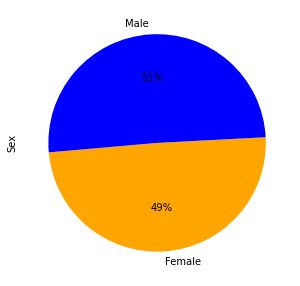

In [97]:
#Plot pie chart
sex_mice.plot.pie(startangle=185,autopct='%1.0f%%', figsize=(5,5),colors=('orange','blue'))


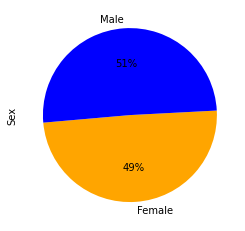

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_mice, labels=('Female','Male'), startangle=185, autopct='%1.00f%%',colors=('orange','blue'))
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
#CHECK IF THE BELOW IS CORRECT
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df =pd.merge(clean_data_df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locating the rows which contain mice on each drug and getting the tumor volumes, adding the volume to the empty list vol_tumor_list
for treatment in drug_regimens:
    temp_df = last_df.loc[last_df['Drug Regimen']==treatment]
    tumor_vol_df = temp_df["Tumor Volume (mm3)"]
    temp_df.append(tumor_vol_df)
    # Determining outliers using upper and lower bounds
    drugquartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = drugquartiles[0.25]
    upperq = drugquartiles[0.75]
    iqr = upperq-lowerq

    print(f'The lower quartile of {treatment} is: {round(lowerq,2)}')
    print(f'The upper quartile of {treatment} is: {round(upperq,2)}')
    print(f'The interquartile range of {treatment} is: {round(iqr,2)}')
    print(f'The median of {treatment} is: {round(drugquartiles[.5],2)}')

    bound_lower = lowerq - (1.5*iqr)
    bound_upper = upperq + (1.5*iqr)
    print(f"Values below {round(bound_lower,2)} are possible outliers for {treatment}.")
    print(f"Values above {round(bound_upper,2)} are possible outliers for {treatment}.")
    outliers = temp_df.loc[(temp_df['Tumor Volume (mm3)']<=bound_lower) | (temp_df['Tumor Volume (mm3)']>=bound_upper)]
    number_of_outliers = len(outliers)
    print(f"\nThe potential outliers for {treatment} are:")
    print(outliers[['Mouse ID','Tumor Volume (mm3)']])
    print('')
   

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin is: 38.13
Values below 20.7 are possible outliers for Capomulin.
Values above 51.83 are possible outliers for Capomulin.

The potential outliers for Capomulin are:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane is: 36.56
Values below 17.91 are possible outliers for Ramicane.
Values above 54.31 are possible outliers for Ramicane.

The potential outliers for Ramicane are:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol is: 60.17
Values below 36.83 are possible outliers for Infubinol.
Values above 82.

C:\Users\daleh\AppData\Local\Temp\ipykernel_5700\416096194.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)
C:\Users\daleh\AppData\Local\Temp\ipykernel_5700\416096194.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)
C:\Users\daleh\AppData\Local\Temp\ipykernel_5700\416096194.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)
C:\Users\daleh\AppData\Local\Temp\ipykernel_5700\416096194.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)


In [101]:
# Creating dataframes for Capomulin, Ramicane, Infubinol, and Ceftamin treatments
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
ramicane_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Ramicane']
infubinol_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Ceftamin']

# Start by getting the highest value timepoint for each mouse in each treatment
capomulin_max = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merging group dataframe with the original dataframe to get the tumor volume at the last timepoint
capomulin_max_df = pd.merge(capomulin_max, clean_data_df, on=['Mouse ID','Timepoint']) 
ramicane_max_df = pd.merge(ramicane_max, clean_data_df, on=['Mouse ID','Timepoint']) 
infubinol_max_df = pd.merge(infubinol_max, clean_data_df, on=['Mouse ID','Timepoint']) 
ceftamin_max_df = pd.merge(ceftamin_max, clean_data_df, on=['Mouse ID','Timepoint'])

#Dataframe to be used for box plot
treatment_group_max = pd.concat([capomulin_max_df,ramicane_max_df,infubinol_max_df,ceftamin_max_df],ignore_index=True)

treatment_group_max 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


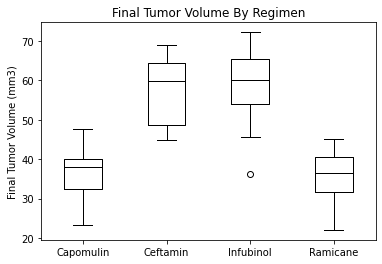

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#MISSING DRUG LABLES ON X AXIS
treatment_group_max.plot.box(column='Tumor Volume (mm3)',by='Drug Regimen', color='black')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume By Regimen')

plt.savefig('Treatment_group_max.png')

plt.show()
plt.close()


## Line and Scatter Plots

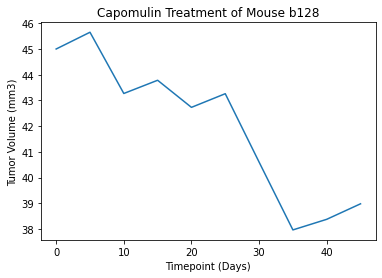

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#NOT COMING RIGHT
capomulin_mouse_b128_df = clean_data_df[clean_data_df['Mouse ID'] == 'b128']
plt.plot(capomulin_mouse_b128_df['Timepoint'], capomulin_mouse_b128_df['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse b128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('Capomulin_mouse_b128.png')

plt.show()
plt.close()


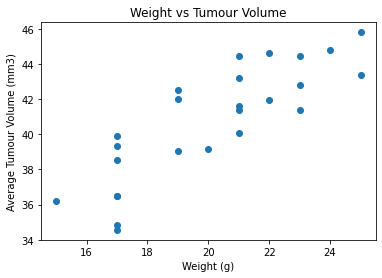

In [104]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = capomulin_df.groupby(["Mouse ID"]).mean()
mouse_weight_avg = capomulin_regimen['Weight (g)']
mouse_tumor_avg = capomulin_regimen['Tumor Volume (mm3)']

plt.scatter(mice_weight_avg, mice_tumor_avg)

plt.title('Weight vs Tumour Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')

plt.savefig('Weight vs Tumour Volume 1.png')
plt.show()
plt.close()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


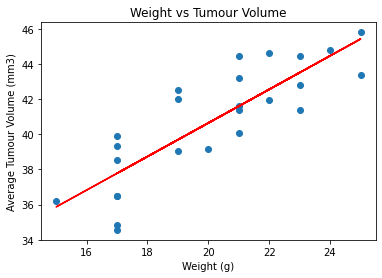

In [105]:
# Calculate the correlation coefficient and a linear regression model 
x_values = mice_weight_avg
y_values = mice_tumor_avg
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(x_values,y_values)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

r_squared = round(rvalue**2,2)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

#Repeating the plot as per above:
plt.scatter(mice_weight_avg, mice_tumor_avg)

plt.title('Weight vs Tumour Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')

plt.savefig('Weight vs Tumour Volume 2.png')
plt.show()
plt.close()